##Importing Libraries

In [0]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
import numpy as np

##Importing Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
raw = pd.read_csv('/content/drive/My Drive/AI/Projects/Bank/bank.csv',sep=";")

In [0]:
raw2 = pd.read_csv('/content/drive/My Drive/AI/Projects/Bank/bank-full.csv',sep=";")

In [0]:
raw2.info

<bound method DataFrame.info of        age           job   marital  education  ... pdays  previous poutcome    y
0       58    management   married   tertiary  ...    -1         0  unknown   no
1       44    technician    single  secondary  ...    -1         0  unknown   no
2       33  entrepreneur   married  secondary  ...    -1         0  unknown   no
3       47   blue-collar   married    unknown  ...    -1         0  unknown   no
4       33       unknown    single    unknown  ...    -1         0  unknown   no
...    ...           ...       ...        ...  ...   ...       ...      ...  ...
45206   51    technician   married   tertiary  ...    -1         0  unknown  yes
45207   71       retired  divorced    primary  ...    -1         0  unknown  yes
45208   72       retired   married  secondary  ...   184         3  success  yes
45209   57   blue-collar   married  secondary  ...    -1         0  unknown   no
45210   37  entrepreneur   married  secondary  ...   188        11    other  

In [0]:
raw.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [0]:
raw.info

<bound method DataFrame.info of       age            job  marital  education  ... pdays  previous poutcome   y
0      30     unemployed  married    primary  ...    -1         0  unknown  no
1      33       services  married  secondary  ...   339         4  failure  no
2      35     management   single   tertiary  ...   330         1  failure  no
3      30     management  married   tertiary  ...    -1         0  unknown  no
4      59    blue-collar  married  secondary  ...    -1         0  unknown  no
...   ...            ...      ...        ...  ...   ...       ...      ...  ..
4516   33       services  married  secondary  ...    -1         0  unknown  no
4517   57  self-employed  married   tertiary  ...    -1         0  unknown  no
4518   57     technician  married  secondary  ...    -1         0  unknown  no
4519   28    blue-collar  married  secondary  ...   211         3    other  no
4520   44   entrepreneur   single   tertiary  ...   249         7    other  no

[4521 rows x 17 col

In [0]:
raw.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [0]:
df = raw

In [0]:
df['job']  = pd.factorize(df['job'])[0] + 1
df['education']  = pd.factorize(df['education'])[0] + 1
df['marital']  = pd.factorize(df['marital'])[0] + 1
df['default']  = pd.factorize(df['default'])[0] + 1
df['housing']  = pd.factorize(df['housing'])[0] + 1
df['loan']  = pd.factorize(df['loan'])[0] + 1
df['contact']  = pd.factorize(df['contact'])[0] + 1
df['month']  = pd.factorize(df['month'])[0] + 1
df['poutcome']  = pd.factorize(df['poutcome'])[0] + 1
df['y']  = pd.factorize(df['y'])[0] + 1

In [0]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,1,1,1,1,1787,1,1,1,19,1,79,1,-1,0,1,1
1,33,2,1,2,1,4789,2,2,1,11,2,220,1,339,4,2,1
2,35,3,2,3,1,1350,2,1,1,16,3,185,1,330,1,2,1
3,30,3,1,3,1,1476,2,2,2,3,4,199,4,-1,0,1,1
4,59,4,1,2,1,0,2,1,2,5,2,226,1,-1,0,1,1
5,35,3,2,3,1,747,1,1,1,23,5,141,2,176,3,2,1
6,36,5,1,3,1,307,2,1,1,14,2,341,1,330,2,3,1
7,39,6,1,2,1,147,2,1,1,6,2,151,2,-1,0,1,1
8,41,7,1,3,1,221,2,1,2,14,2,57,2,-1,0,1,1
9,43,2,1,1,1,-88,2,2,1,17,3,313,1,147,2,2,1


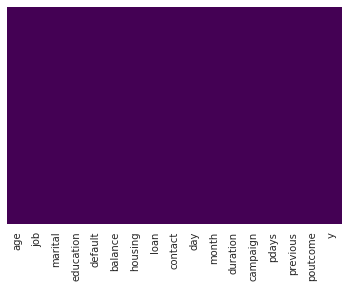

In [0]:
sns.heatmap(raw.isnull(),yticklabels=False,cbar=False,cmap='viridis')

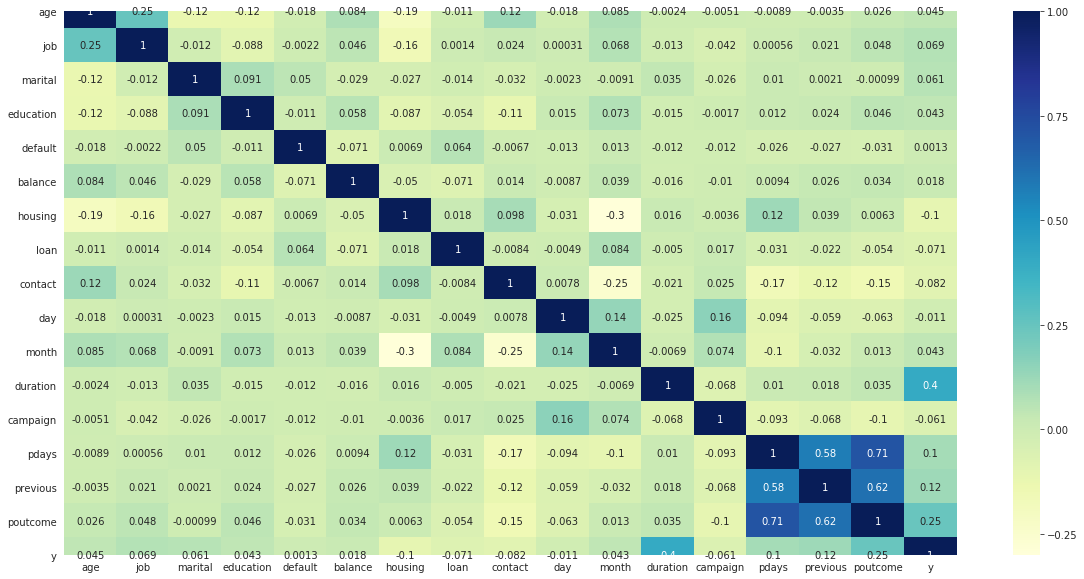

In [0]:
correlation=df.corr()
fig = plt.figure(figsize=(20,10))
HeatMapY = sns.heatmap(correlation,annot=True,cmap='YlGnBu')

In [0]:
df.drop('day',axis=1,inplace=True)
df.drop('balance',axis=1,inplace=True)

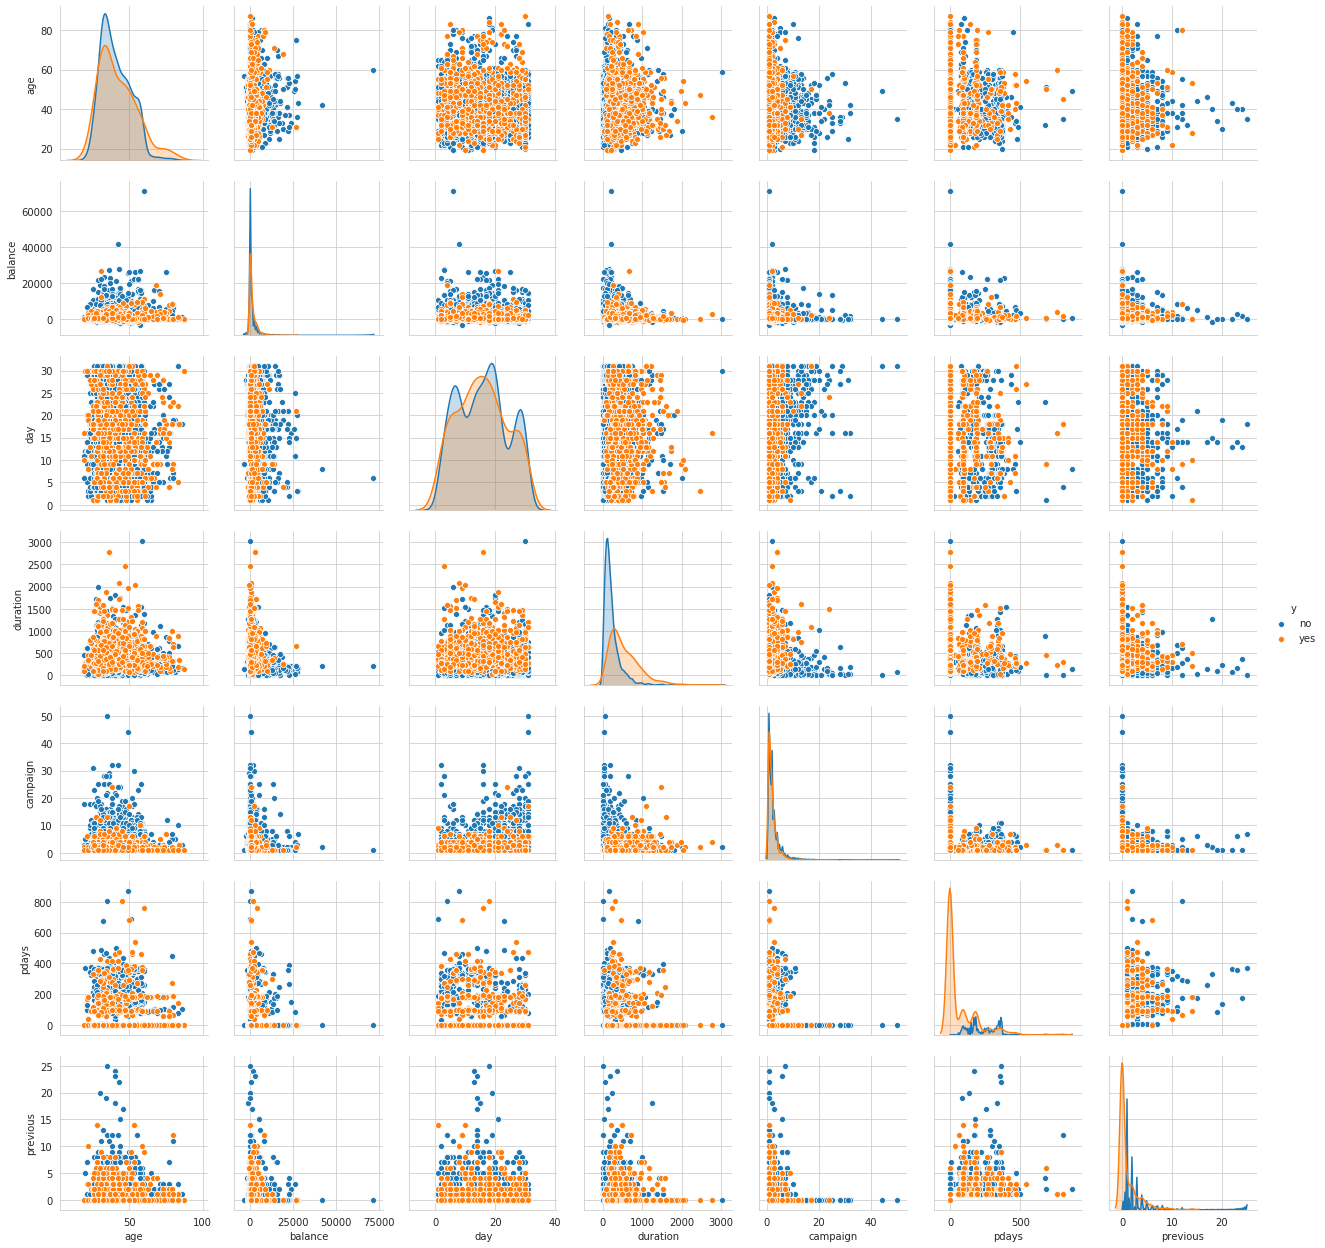

In [0]:
pair_plot = sns.pairplot(raw,hue='y')
pair_plot.savefig("PairPlotY3")

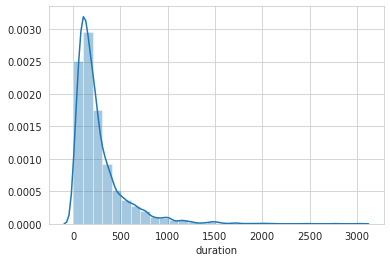

In [0]:
sns.distplot(df['duration'],kde=True,bins=30)

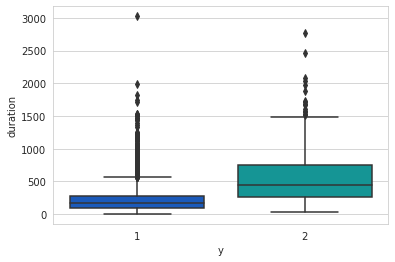

In [0]:
sns.boxplot(x='y',y='duration',data=df,palette='winter')

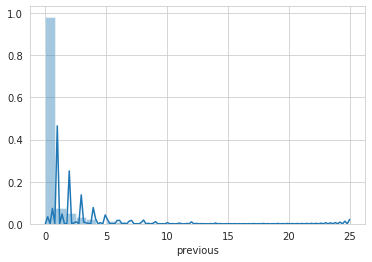

In [0]:
sns.distplot(df['previous'],kde=True,bins=30)

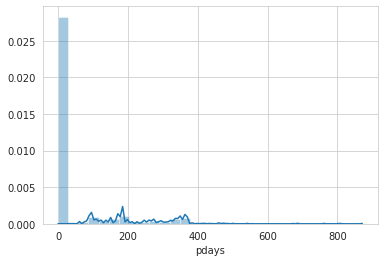

In [0]:
sns.distplot(df['pdays'],kde=True,bins=30)

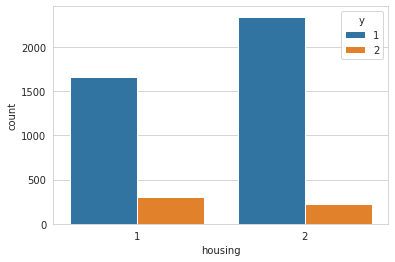

In [0]:
sns.countplot(df['housing'],hue=df["y"])

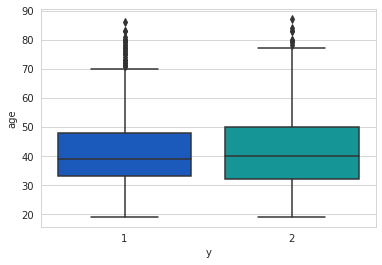

In [0]:
sns.boxplot(x='y',y='age',data=df,palette='winter')

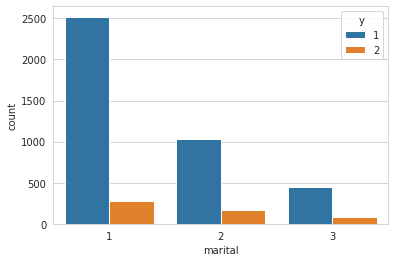

In [0]:
sns.countplot(df['marital'],hue=df["y"])

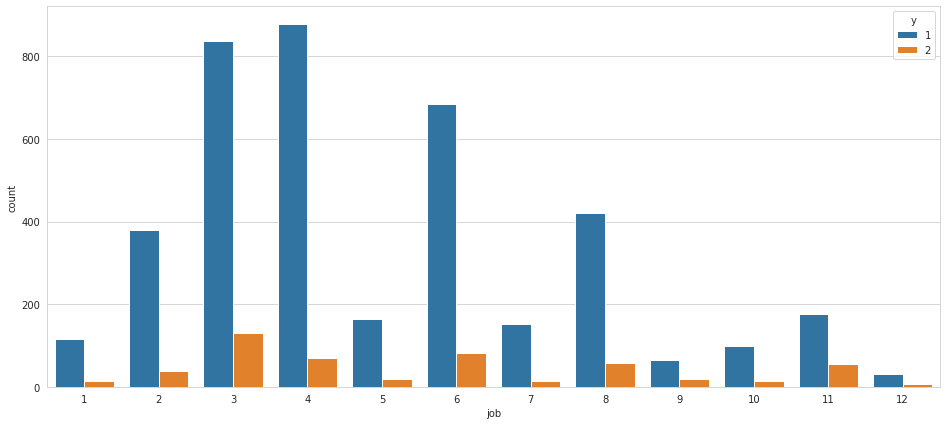

In [0]:
plt.figure(figsize=(16, 7))
sns.countplot(df['job'],hue=df["y"])

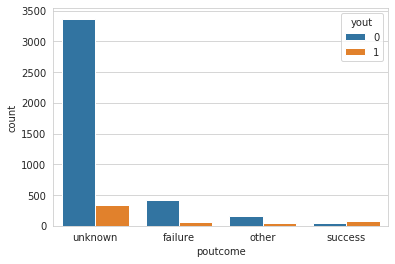

In [0]:
sns.countplot(df['poutcome'].dropna(),hue=df["y"])

##Data Preprossing

In [0]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [0]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
x[:,1]=label_encoder.fit_transform(x[:,1])

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,accuracy_score,f1_score,roc_curve

##Using Logistic Regression Classifier





In [0]:
classifier=LogisticRegression(random_state=0)

In [0]:
classifier.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted=classifier.predict(x_test)

In [0]:
print("Accuracy is "+str(accuracy_score(y_test, predicted)*100))
print("Confusion Matrix \n"+str(confusion_matrix(y_test,predicted))) 
print("Classification Report \n"+str(classification_report(y_test, predicted))) 

Accuracy is 88.57774502579218
Confusion Matrix 
[[1154   36]
 [ 119   48]]
Classification Report 
              precision    recall  f1-score   support

           1       0.91      0.97      0.94      1190
           2       0.57      0.29      0.38       167

    accuracy                           0.89      1357
   macro avg       0.74      0.63      0.66      1357
weighted avg       0.87      0.89      0.87      1357



##Using KNeighborsClassifier




In [0]:
accuracy_k=[]
f1 = []
for i in range(1,15):
  classifier_k = KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski')
  classifier_k.fit(x_train,y_train)
  predicted_k=classifier_k.predict(x_test)
  accuracy_k.append( accuracy_score(y_test,predicted_k))
  f1.append(f1_score(y_test,predicted_k))

In [0]:
f1

[0.9088618227635448,
 0.9299158990788947,
 0.9233920524375255,
 0.9288000000000001,
 0.9292357460574201,
 0.9297685554668795,
 0.9298387096774193,
 0.9337060702875399,
 0.9308125502815768,
 0.9312,
 0.932155760738659,
 0.9323248407643312,
 0.9306613226452907,
 0.9331742243436755]

Text(0.5, 1.0, 'F1 Score vs Number of Neighbors')

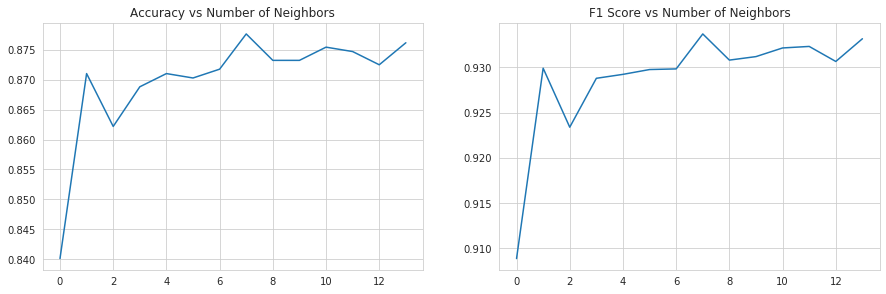

In [0]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(accuracy_k)
plt.title("Accuracy vs Number of Neighbors")
plt.subplot(2,2,2)
plt.plot(f1)
plt.title("F1 Score vs Number of Neighbors")

In [0]:
classifier1=KNeighborsClassifier(n_neighbors=7,p=2,metric='minkowski')

In [0]:
classifier1.fit(x_train,y_train)
predicted1=classifier1.predict(x_test)
print("Accuracy is "+str(accuracy_score(y_test, predicted1)*100))
print("Confusion Matrix \n"+str(confusion_matrix(y_test,predicted1))) 
print("Classification Report \n"+str(classification_report(y_test, predicted1))) 

Accuracy is 87.17759764185703
Confusion Matrix 
[[1153   37]
 [ 137   30]]
Classification Report 
              precision    recall  f1-score   support

           1       0.89      0.97      0.93      1190
           2       0.45      0.18      0.26       167

    accuracy                           0.87      1357
   macro avg       0.67      0.57      0.59      1357
weighted avg       0.84      0.87      0.85      1357



##Using Gaussian Naive Bayes

In [0]:
classifier2=GaussianNB()

In [0]:
classifier2.fit(x_train,y_train)
predicted2=classifier2.predict(x_test)

In [0]:
print("Accuracy is "+str(accuracy_score(y_test, predicted2)*100))
print("Confusion Matrix \n"+str(confusion_matrix(y_test,predicted2))) 
print("Classification Report \n"+str(classification_report(y_test, predicted2))) 

Accuracy is 83.19823139277818
Confusion Matrix 
[[1050  140]
 [  88   79]]
Classification Report 
              precision    recall  f1-score   support

           1       0.92      0.88      0.90      1190
           2       0.36      0.47      0.41       167

    accuracy                           0.83      1357
   macro avg       0.64      0.68      0.66      1357
weighted avg       0.85      0.83      0.84      1357



## CV TRIAL

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

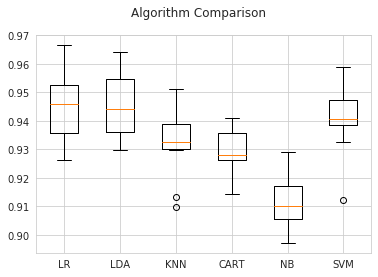

In [0]:
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##Testing Results with new Data

In [0]:
raw2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [0]:
raw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [0]:
df2=raw2

In [0]:
df2['job']  = pd.factorize(df2['job'])[0] + 1
df2['education']  = pd.factorize(df2['education'])[0] + 1
df2['marital']  = pd.factorize(df2['marital'])[0] + 1
df2['default']  = pd.factorize(df2['default'])[0] + 1
df2['housing']  = pd.factorize(df2['housing'])[0] + 1
df2['loan']  = pd.factorize(df2['loan'])[0] + 1
df2['contact']  = pd.factorize(df2['contact'])[0] + 1
df2['month']  = pd.factorize(df2['month'])[0] + 1
df2['poutcome']  = pd.factorize(df2['poutcome'])[0] + 1
df2['y']  = pd.factorize(df2['y'])[0] + 1

In [0]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,1,1,1,2143,1,1,1,5,1,261,1,-1,0,1,1
1,44,2,2,2,1,29,1,1,1,5,1,151,1,-1,0,1,1
2,33,3,1,2,1,2,1,2,1,5,1,76,1,-1,0,1,1
3,47,4,1,3,1,1506,1,1,1,5,1,92,1,-1,0,1,1
4,33,5,2,3,1,1,2,1,1,5,1,198,1,-1,0,1,1


In [0]:
raw2.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.526133,1.513238,2.049944,1.018027,1362.272058,1.444162,1.160226,1.776293,15.806419,3.940722,258.163080,2.763841,40.197828,0.580323,1.290062,1.116985
std,10.618762,3.098343,0.692948,0.968986,0.133049,3044.765829,0.496878,0.366820,0.549747,8.322476,3.179741,257.527812,3.098021,100.128746,2.303441,0.698469,0.321406
min,18.000000,1.000000,1.000000,1.000000,1.000000,-8019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000,1.000000
25%,33.000000,2.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,8.000000,1.000000,103.000000,1.000000,-1.000000,0.000000,1.000000,1.000000
50%,39.000000,4.000000,1.000000,2.000000,1.000000,448.000000,1.000000,1.000000,2.000000,16.000000,3.000000,180.000000,2.000000,-1.000000,0.000000,1.000000,1.000000
75%,48.000000,7.000000,2.000000,2.000000,1.000000,1428.000000,2.000000,1.000000,2.000000,21.000000,6.000000,319.000000,3.000000,-1.000000,0.000000,1.000000,1.000000
max,95.000000,12.000000,3.000000,4.000000,2.000000,102127.000000,2.000000,2.000000,3.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,4.000000,2.000000


In [0]:
x2=df2.iloc[:,:-1].values
y2=df2.iloc[:,-1].values

In [0]:
new_pred = classifier.predict(x2)
new_pred1 = classifier1.predict(x2)
new_pred2 = classifier2.predict(x2)

In [0]:
print("Accuracy is "+str(accuracy_score(y2, new_pred)*100))
print("Confusion Matrix \n"+str(confusion_matrix(y2,new_pred))) 
print("Classification Report \n"+str(classification_report(y2, new_pred))) 

Accuracy is 88.85227046515229
Confusion Matrix 
[[39229   693]
 [ 4347   942]]
Classification Report 
              precision    recall  f1-score   support

           1       0.90      0.98      0.94     39922
           2       0.58      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.58      0.61     45211
weighted avg       0.86      0.89      0.86     45211



In [0]:
print("Accuracy is "+str(accuracy_score(y2, new_pred1)*100))
print("Confusion Matrix \n"+str(confusion_matrix(y2,new_pred1))) 
print("Classification Report \n"+str(classification_report(y2, new_pred1))) 

Accuracy is 88.41653579881003
Confusion Matrix 
[[38953   969]
 [ 4268  1021]]
Classification Report 
              precision    recall  f1-score   support

           1       0.90      0.98      0.94     39922
           2       0.51      0.19      0.28      5289

    accuracy                           0.88     45211
   macro avg       0.71      0.58      0.61     45211
weighted avg       0.86      0.88      0.86     45211



In [0]:
print("Accuracy is "+str(accuracy_score(y2, new_pred2)*100))
print("Confusion Matrix \n"+str(confusion_matrix(y2,new_pred2))) 
print("Classification Report \n"+str(classification_report(y2, new_pred2))) 

Accuracy is 83.82694477007809
Confusion Matrix 
[[35388  4534]
 [ 2778  2511]]
Classification Report 
              precision    recall  f1-score   support

           1       0.93      0.89      0.91     39922
           2       0.36      0.47      0.41      5289

    accuracy                           0.84     45211
   macro avg       0.64      0.68      0.66     45211
weighted avg       0.86      0.84      0.85     45211



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

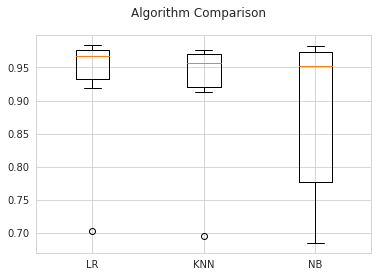

In [0]:
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x2, y2, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()